In [14]:
# import sys
# sys.path.append('/Users/125715/python/fluidlib')
import math as m
import matplotlib.pyplot as plt
import numpy as np
import conversion_library as c; 
import volume_calc as v
import mat_lib as mat
import thermal_solver as t
from scipy.integrate import solve_ivp
# from fluidlib import flow_prop_calc as f
import gc


In [23]:
node1 = t.Node(
    T = 273.15+90,
    Pressure= c.psi2pa(115),
    medium="ARGON",
    medium_type="FLUID",
    isothermal=True
)
node2 = t.Node(
    T = 273.15 + 30,
    Pressure= 101325,
    medium="AIR",
    medium_type="FLUID",
    isothermal=True
)
node3 = t.Node(
    T=273.15+30,
    medium="SS316",
    medium_type="SOLID",
    V=v.cylinder(c.inch2m(0.75), 1) - v.cylinder(c.inch2m(0.75-2*.065), 1)
)
a = t.Path(
    nodeA = node1,
    nodeB = node3,
    Aconv=m.pi/4*c.inch2m(0.75-2*.065)*1,
    h= 20.2
)
b = t.Path(
    nodeA=node2,
    nodeB=node3,
    Aconv=m.pi/4*c.inch2m(0.75)*1,
    h= 4.6
)
nodes = [node1, node2, node3]
paths = [a, b]
t_span = [0,1e5]
t_eval = np.linspace(t_span[0], t_span[1], 100)

y = t.T_vs_t(
    t_span,
    t_eval,
    paths,
    nodes
)

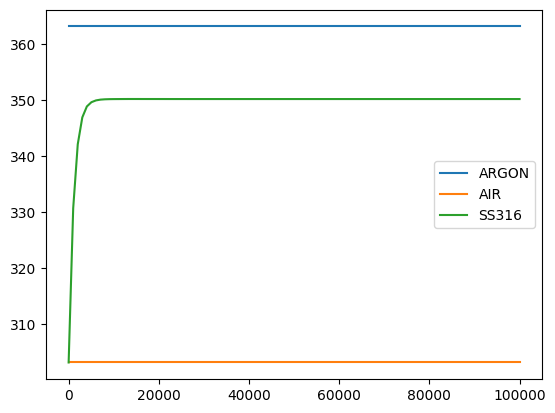

In [24]:
plt.plot(y.t, y.y[0])
plt.plot(y.t, y.y[1])
plt.plot(y.t, y.y[2])
plt.legend([node1.medium, node2.medium, node3.medium])

In [25]:
#q = hA(T1-T2)
print(a.h * a.Aconv * (y.y[2][-1] - y.y[0][-1]),
    a.Aconv,
    a.h,
    y.y[2][-1],
    y.y[0][-1]
)

-3.2376009209626178 0.012368450277183014 20.2 350.19144256369316 363.15


In [26]:
print(b.h * b.Aconv * (y.y[2][-1] - y.y[1][-1]),
    b.Aconv,
    b.h,y.y[2][-1],
    y.y[1][-1]
)

3.237600991032579 0.014961835012721388 4.6 350.19144256369316 303.15


In [27]:
b.h * b.Aconv / (a.h * a.Aconv)

0.27547109549664645

In [28]:
(y.y[2][0] - y.y[1][0]) / (y.y[2][0] - y.y[0][0])

np.float64(-0.0)

In [29]:
print(a.Acond,
    b.Acond,
    a.Arad,
    b.Arad)

0.0 0.0 0.0 0.0


In [30]:
m.pi/4*0.62**2

0.30190705400997914

In [31]:
v.cylinder(1,65.37)
Dh = c.inch2m(5.5)
print(Dh)
A = c.si2sm(.44)
print(A)
c.pa2psi(.175)

0.1397
0.0002838704


2.5381594138157092e-05

In [14]:
VredTee = c.cmm2cin(833070.56)
VFlange = c.cmm2cin(34587.71)
print(VFlange)
V_cylinder = v.cylinder(1, 86.59)
print(str(V_cylinder) + " cu-in")
print(2*c.cmm2cin(34587.11))
print(V_cylinder + 4.22 + (3*2.06))
c.cintocm(57.83)*1000

2.110671563862813
68.00762696858504 cu-in
4.221269899232713
78.40762696858505


0.9476639110381953

In [5]:
V_pipe = v.cylinder(1, 64.42)
V_Flange = v.cylinder(1.05, 2.438)*2 +2.32
V_tee = 3.54
V_elbow = 2.06*2
VTotal = V_pipe + V_Flange + V_tee + V_elbow
c.cintocm(VTotal)*1000



1.0618405382123053

In [6]:
cp=float(c.getFluidProperty(hOut='CPMASS', hIn='TD', val1=273, val2=.082, hFLd='HYDROGEN'))
cv=c.getFluidProperty(hOut='CVMASS', hIn='TD', val1=273, val2=.082, hFLd='HYDROGEN')
M = c.getFluidProperty(hOut='MOLARMASS', hIn='TD', val1=273, val2 = 0.082, hFLd='HYDROGEN')
print(M)
print(cp)


0.00201588
14196.48992953047


In [7]:
E = mat.getMatProp(mat.SS316, "E")*1e9
print(c.pa2psi(E))
k = mat.getMatProp(mat.SS316, "k")
print(k)
print(c.inch2m(6.25))
print(c.getFluidProperty(hOut= 'V', hIn='TD', val1= 375, val2= 0.082, hFLd='HYDROGEN'))
print(c.si2sm(76.404))

27992272.392367534
16.3
0.15875
1.0431405681397594e-05
0.04929280463999999


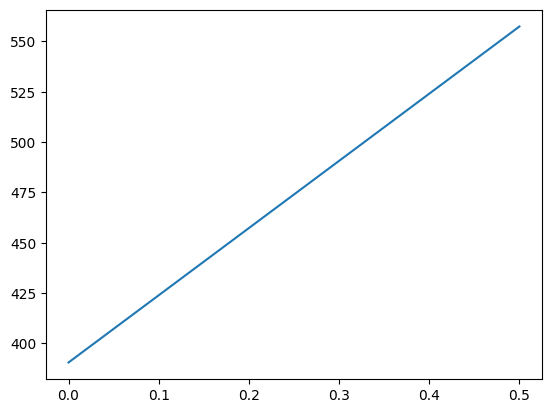

In [8]:
Tm_i = (273+508)/2
x = np.linspace(0,.5, 1000)
D=c.inch2m(.402)
qFlux = 59102 #W/m^2
P= m.pi*D
mdot = .0004 #kg/s
Tmx = Tm_i + qFlux*P/(mdot*14196)*x
plt.plot(x, Tmx)
